#Basic mne functions

---

In [ ]:
 !pip install mne 

Importing 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne 

In [ ]:
# MNE provides an easy way of reading in a edf file 
file_name = "/content/drive/My Drive/Colab Notebooks/data/eeg/chb01_01.edf"

# This just refernces the data file BUT does not load into memory 
raw = mne.io.read_raw_edf(file_name)

# if you want to load the data into memory you need to add the following 
raw = mne.io.read_raw_edf(file_name, preload=True)


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/data/eeg/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/data/eeg/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-49-5871c1bc907f>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_name)
<ipython-input-49-5871c1bc907f>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_name, preload=True)


In [ ]:
# Here we can see all the data and meta data that is stored in the mne object 
raw.__dict__

{'_annotations': <Annotations | 0 segments>,
 '_cals': array([6552000., 6552000., 6552000., 6552000., 6552000., 6552000.,
        6552000., 6552000., 6552000., 6552000., 6552000., 6552000.,
        6552000., 6552000., 6552000., 6552000., 6552000., 6552000.,
        6552000., 6552000., 6552000., 6552000., 6552000.]),
 '_comp': None,
 '_data': array([[-1.45934066e-04,  1.95360195e-07,  1.95360195e-07, ...,
         -1.15262515e-05, -2.93040293e-06,  1.93406593e-05],
        [-1.04517705e-04,  1.95360195e-07,  1.95360195e-07, ...,
          2.36385836e-05,  2.75457875e-05,  3.06715507e-05],
        [-4.27838828e-05,  1.95360195e-07,  1.95360195e-07, ...,
          4.86446886e-05,  4.51282051e-05,  3.45787546e-05],
        ...,
        [-2.64713065e-04,  1.95360195e-07,  5.86080586e-07, ...,
          9.76800977e-07, -1.58241758e-05, -2.94993895e-05],
        [ 9.47496947e-05,  1.95360195e-07,  1.95360195e-07, ...,
         -7.22832723e-06, -1.03540904e-05, -1.34798535e-05],
        [ 4.47

In [ ]:
# Here I have layed out the most import attributes 

print(raw.ch_names) # Print a list of channel names 
print(raw._data) # Get raw eeg signals 
print(raw.info['sfreq'])  # get the sample rate
print(raw._data.shape) # get the size of the data matrix

# we can also find out how long in secs the raw data segment is: 
print(raw._data.shape[1]/raw.info['sfreq'])


# Note Note Accessing the ._data is just for show here  his is a private attribute 
# uou can not access it directly but rely on indexing as shown bellow

['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
[[-1.45934066e-04  1.95360195e-07  1.95360195e-07 ... -1.15262515e-05
  -2.93040293e-06  1.93406593e-05]
 [-1.04517705e-04  1.95360195e-07  1.95360195e-07 ...  2.36385836e-05
   2.75457875e-05  3.06715507e-05]
 [-4.27838828e-05  1.95360195e-07  1.95360195e-07 ...  4.86446886e-05
   4.51282051e-05  3.45787546e-05]
 ...
 [-2.64713065e-04  1.95360195e-07  5.86080586e-07 ...  9.76800977e-07
  -1.58241758e-05 -2.94993895e-05]
 [ 9.47496947e-05  1.95360195e-07  1.95360195e-07 ... -7.22832723e-06
  -1.03540904e-05 -1.34798535e-05]
 [ 4.47374847e-05  1.95360195e-07  1.95360195e-07 ...  1.69963370e-05
   2.24664225e-05  2.63736264e-05]]
256.0
(23, 921600)
3600.0


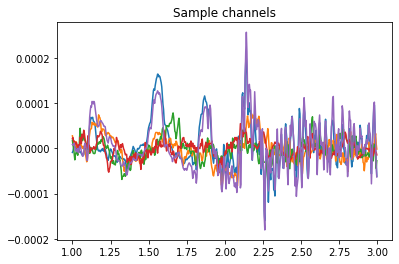

In [ ]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T) # Note the we must use .T to transpose the data to use the plt function 
_ = plt.title('Sample channels')

In [ ]:
# lets find the min and max value in our raw data
print("The min value is " +  str(np.amin(raw._data)) )  
print("The max value is " +  str(np.amax(raw._data)) ) 


The min value is -0.0008824420024420024
The max value is 0.0010379487179487177


#Notch *Filter*

---

Looking at psd graphs before applying the notch filter

Effective window size : 8.000 (s)


<ipython-input-54-93c6330200f2>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=50, fmax=70)


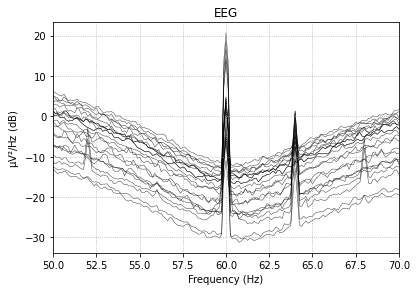

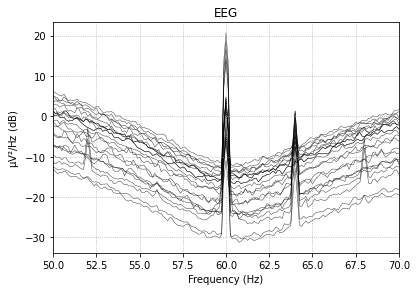

In [ ]:
# Lets print just on all channels the power spectral denstry (psd) before applying the notch filter only seeing 50-70 Hz 
raw.plot_psd(fmin=50, fmax=70)

Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-55-1268cfb7bf33>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=50, fmax=70, picks=["F7-T7"])


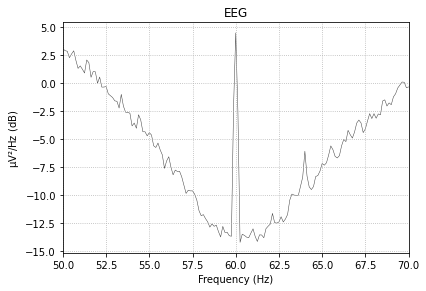

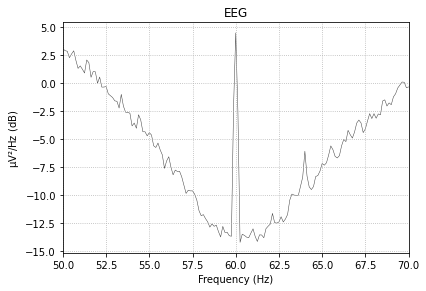

In [ ]:
# Lets print just one channel the power spectral denstry (psd) before applying the notch filter only seeing 50-70 Hz 
raw.plot_psd(fmin=50, fmax=70, picks=["F7-T7"])

Apllying the notch filter 

In [ ]:
# Lets apply the notch filter around 60 Hz 
raw.notch_filter(freqs=60)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 sec)



<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.8 MB, data loaded>

Now we can plot the psd after we apply the notch filter 

Effective window size : 8.000 (s)


<ipython-input-57-87833b745100>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=50, fmax=70)


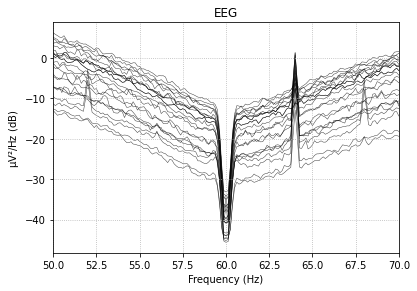

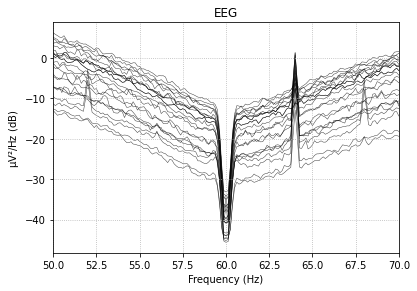

In [ ]:
raw.plot_psd(fmin=50, fmax=70)

Effective window size : 8.000 (s)


<ipython-input-58-e9f4903dd339>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


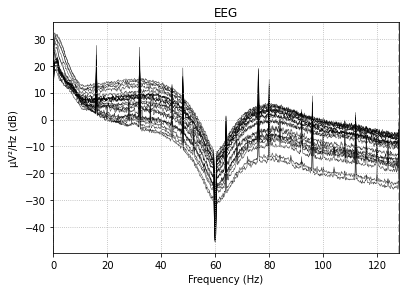

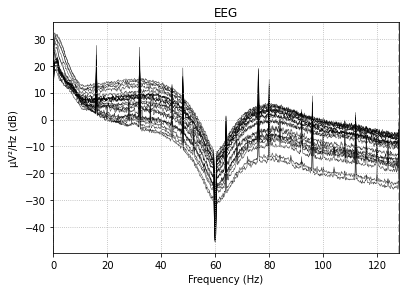

In [ ]:
# Now we can plot both graphs after applying the filter 
raw.plot_psd()